In [1]:
#!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
# tmdb 영화 크롤링 csv파일 불러오기 
files = os.listdir('../data-files/')
files

In [ ]:
# csv파일 DB(mysql)에 저장  ->   510,392개 데이터

import pymysql

# 1. connect
conn = pymysql.connect(host="127.0.0.1", port=3306, db='finalteam3', user="kdigital", password="mysql", charset="utf8")

# 2. get command object
cursor = conn.cursor()

cursor.execute("delete from movie") #기존 데이터를 지울 때 주석을 풀어주세요 

error_list = []
movie3 = []
for file in files:
    # if file.find('tmdbmovielist') == 0 and file.find('100000-149999') == -1 and file.find('20000-99999') == -1:
    if file.find('tmdbmovielist') == 0:
        print(file)
        try:
            try :
                movies = pd.read_csv('../data-files/{0}'.format(file), encoding="utf-8")
            except:
                movies = pd.read_csv('../data-files/{0}'.format(file), encoding="utf-8", lineterminator='\n')

            movies.drop(movies.columns[0], axis=1, inplace=True)

            movies2 = movies[movies['status_message'].isna()] # # "The resource you requested could not be found.,,,,,,,,,,,,,,,,,,,,,,,,," 를 포함한 행 제거

            movies2 = movies2.drop(["success","status_code","status_message"], axis=1)
            movie3.append(list(movies2.values))
            # movies2['original_language'] = movies2['original_language'].apply(lambda ol: ol if ol else '')
            movies2['overview'] = movies2['overview'].apply(lambda ov : ov if str(ov) != 'nan' else '')
            movies2['release_date'] = movies2['release_date'].apply(lambda ov : ov if str(ov) != 'nan' else '')
            movies2['poster_path'] = movies2['poster_path'].apply(lambda ov : ov if str(ov) != 'nan' else '')
            print(movies2.values.shape)
            # 3. execute command
            sql = """insert into movie (movie_id, title, subtitle, original_language, overview, popularity, release_date, vote_average, vote_count, posterpath) 
                    values (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""
            for movie in movies2.values:
                cursor.execute(sql, list(movie[list(np.array([9, 24, 12, 11, 13, 14, 18, 26, 27, 15]) - 3)]))
                
                

        except:
            error_list.append(movie[list(np.array([9, 24, 12, 11, 13, 14, 18, 26, 27, 15]) - 3)])
        
        # break

conn.commit() # confirm previous executio
# 4. close resource
cursor.close()
conn.close()

In [4]:
movies3 = []
for movie in movie3:
    for r in movie:
        movies3.append(r)
        
movies3 = pd.DataFrame(movies3)

In [19]:
header=movies2.columns.tolist()

In [26]:
#movies3에 header삽입
movies3.columns=header

In [27]:
movies3.info()   # 630159 entries (DB저장 자료수와 차이있음.)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630159 entries, 0 to 630185
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   adult                  630158 non-null  object 
 1   backdrop_path          150102 non-null  object 
 2   belongs_to_collection  11995 non-null   object 
 3   budget                 630157 non-null  object 
 4   genres                 630155 non-null  object 
 5   homepage               69801 non-null   object 
 6   id                     630156 non-null  object 
 7   imdb_id                396414 non-null  object 
 8   original_language      630157 non-null  object 
 9   original_title         630130 non-null  object 
 10  overview               25238 non-null   object 
 11  popularity             630119 non-null  object 
 12  poster_path            426255 non-null  object 
 13  production_companies   630119 non-null  object 
 14  production_countries   630088 non-nu

In [51]:
# 중복데이터 여부 확인 

sum(movies3.duplicated())  # => 0개

0

In [52]:
# csv로 저장
movies3.to_csv("total_tmdbmovielist.csv", mode='w')

In [15]:
movies3 = pd.read_csv(r"C:\team3_data\project-team3-data\data-files\total_tmdbmovielist.csv", index_col=0)

C:\Users\bonomania\.conda\envs\ykseo\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,4,7,12,17,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
movies3.info()
# total row = 630159 entries
# total column = 25 columns
# release_date, budget, revenue 데이터 타입 변경 필요       

movies3.head()

# 다음에 해당하는 영화를 다수 포함하고 있음. 
# budget, revenue, runtime 값이 0인 영화
# genre, release_date 정보가 없는 영화 
# vote_average, vote_count가 0인 영화 
# 필요없는 칼럼: backdrop_path, belongs_to_collection, homepage, imdb_id, tagline

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630159 entries, 0 to 630185
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   adult                  630158 non-null  object 
 1   backdrop_path          150102 non-null  object 
 2   belongs_to_collection  11995 non-null   object 
 3   budget                 630157 non-null  object 
 4   genres                 630155 non-null  object 
 5   homepage               69801 non-null   object 
 6   id                     630156 non-null  object 
 7   imdb_id                396414 non-null  object 
 8   original_language      630157 non-null  object 
 9   original_title         630130 non-null  object 
 10  overview               25238 non-null   object 
 11  popularity             630119 non-null  object 
 12  poster_path            426255 non-null  object 
 13  production_companies   630119 non-null  object 
 14  production_countries   630088 non-nu

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,NaN,0.0,"[{'id': 18, 'name': '드라마'}, {'id': 80, 'name':...",NaN,2.0,tt0094675,fi,Ariel,...,1988-10-21,0.0,73.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,아리엘,False,6.9,150.0
1,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,NaN,0.0,"[{'id': 18, 'name': '드라마'}, {'id': 35, 'name':...",NaN,3.0,tt0092149,fi,Varjoja paratiisissa,...,1986-10-17,0.0,76.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,천국의 그림자,False,7.2,149.0
2,False,/bCXLsO2MJWzYYBJoavGOZN5iqGn.jpg,NaN,4000000.0,"[{'id': 80, 'name': '범죄'}, {'id': 35, 'name': ...",https://www.miramax.com/movie/four-rooms/,5.0,tt0113101,en,Four Rooms,...,1995-12-09,4257354.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,네 가지 이야기들로 이루어진 옴니버스 영화,포룸,False,5.7,2035.0
3,False,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,NaN,21000000.0,"[{'id': 28, 'name': '액션'}, {'id': 53, 'name': ...",NaN,6.0,tt0107286,en,Judgment Night,...,1993-10-15,12136938.0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,킬러 나이트,False,6.5,215.0
4,False,NaN,NaN,42000.0,"[{'id': 99, 'name': '다큐멘터리'}]",http://www.lifeinloops.com,8.0,tt0825671,en,Life in Loops (A Megacities RMX),...,2006-01-01,0.0,80.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Life in Loops (A Megacities RMX),False,7.5,18.0


In [18]:
# 필요없는 칼럼제거 (backdrop_path: 1, belongs_to_collection:2, homepage:4, imdb_id:6, tagline:14) => movies3_df 
movies3_df=movies3.drop(['backdrop_path','belongs_to_collection','homepage','imdb_id','tagline'], axis=1)

In [19]:
# na를 포함하는 데이터 수 확인

# movies3withcredits_df.isna().sum()
movies3_df.isna().apply(pd.value_counts)

,adult,budget,genres,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
False,630158,630157,630155,630156,630157,630130,25238,630119,426255,630119,630088,571778,630088,577000,630088,630088,630086,630086,630086,630086
True,1,2,4,3,2,29,604921,40,203904,40,71,58381,71,53159,71,71,73,73,73,73


In [20]:
# na를 포함한 행제거

movies3_df=movies3_df.dropna()
movies3_df.isna().apply(pd.value_counts)
movies3_df.shape

(23170, 20)

In [32]:
# release_date 데이터 타입 변경 
movies3_df['release_date']=pd.to_datetime(movies3_df['release_date'])

In [33]:
# budget, revenue 데이터 타입 변경
movies3_df['budget']=pd.to_numeric(movies3_df['budget'])

In [34]:
# budget, revenue 데이터 타입 변경
movies3_df['revenue']=pd.to_numeric(movies3_df['revenue'])

In [35]:
movies3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22842 entries, 0 to 630081
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 22842 non-null  object        
 1   budget                22842 non-null  float64       
 2   genres                22842 non-null  object        
 3   id                    22842 non-null  object        
 4   original_language     22842 non-null  object        
 5   original_title        22842 non-null  object        
 6   overview              22842 non-null  object        
 7   popularity            22842 non-null  object        
 8   poster_path           22842 non-null  object        
 9   production_companies  22842 non-null  object        
 10  production_countries  22842 non-null  object        
 11  release_date          22842 non-null  datetime64[ns]
 12  revenue               22842 non-null  float64       
 13  runtime        

In [36]:
movies3_df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,2.284200e+04,2.284200e+04,22842.000000,22842.000000,22842.000000
mean,7.794220e+06,2.249766e+07,98.887838,5.635303,533.375405
std,2.376264e+07,9.470873e+07,29.952560,2.274114,1643.178019
min,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,88.000000,5.300000,4.000000
50%,0.000000e+00,0.000000e+00,98.000000,6.300000,47.000000
75%,1.231730e+06,6.687068e+05,111.000000,7.000000,313.000000
max,3.800000e+08,2.847246e+09,1963.000000,10.000000,27092.000000


In [37]:
# runtime이 zero인 영화
movies3_df[movies3_df['runtime'] == 0].index

Int64Index([], dtype='int64')

In [38]:
# runtime이 zero인 영화 제거
movies3_df=movies3_df[movies3_df['runtime'] !=0]

In [39]:
movies3_df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,2.284200e+04,2.284200e+04,22842.000000,22842.000000,22842.000000
mean,7.794220e+06,2.249766e+07,98.887838,5.635303,533.375405
std,2.376264e+07,9.470873e+07,29.952560,2.274114,1643.178019
min,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,88.000000,5.300000,4.000000
50%,0.000000e+00,0.000000e+00,98.000000,6.300000,47.000000
75%,1.231730e+06,6.687068e+05,111.000000,7.000000,313.000000
max,3.800000e+08,2.847246e+09,1963.000000,10.000000,27092.000000


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'release_date'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'vote_count'}>]], dtype=object)

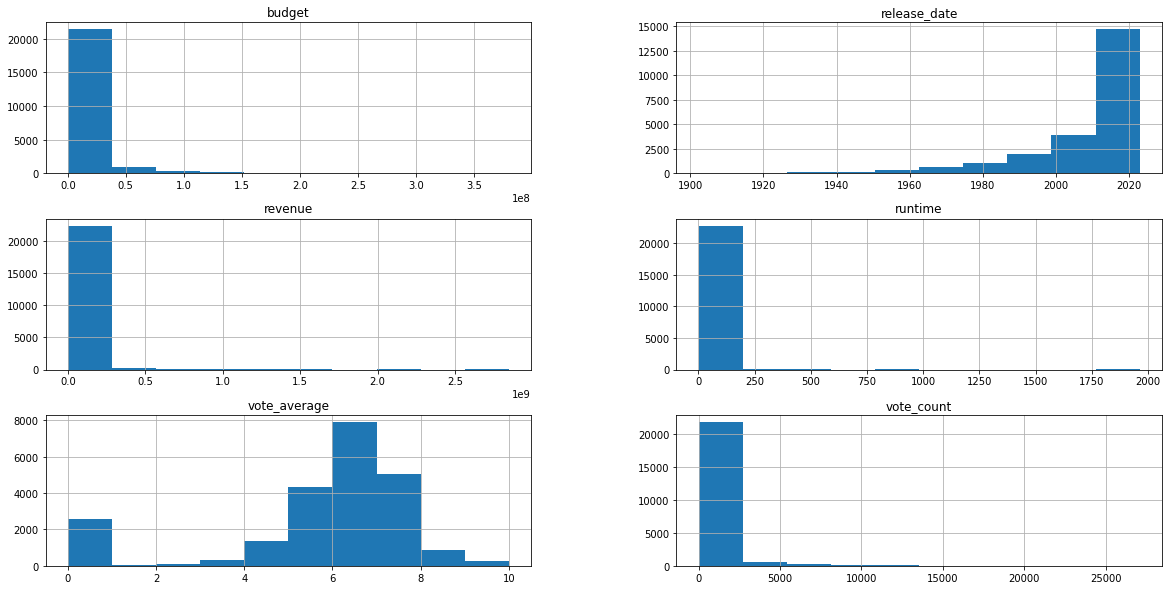

In [42]:
movies3_df.hist(figsize=(20,10))

In [92]:
#### vote_average ###

# Q1. vote count가 533(vote_count 평균)개 이상인 영화 중 평점이 가장 높은 영화는?
high_vote=movies3_df.sort_values(by='vote_average',ascending=False)
high_vote=high_vote[high_vote.vote_count>533]
high_vote[['id','title','vote_average','vote_count']].head(10)

,id,title,vote_average,vote_count
192,238.0,대부,8.7,15086.0
36377,19404.0,용감한 자가 신부를 데려가리,8.7,3241.0
230,278.0,쇼생크 탈출,8.7,20134.0
193534,372058.0,너의 이름은.,8.6,8072.0
194,240.0,대부 2,8.6,9076.0
332,424.0,쉰들러 리스트,8.6,12041.0
608,769.0,좋은 친구들,8.5,9507.0
4858,11216.0,시네마 천국,8.5,3117.0
550,680.0,펄프 픽션,8.5,22098.0
382399,592350.0,나의 히어로 아카데미아 더 무비: 히어로즈 라이징,8.5,822.0


In [93]:
#### revenue, budget, profit ###

# Q2. Which Movie Has The Highest Or Lowest Profit? Top 10 movies which earn highest profit?

movies3_df['profit'] = movies3_df.revenue - movies3_df.budget
high_profit=movies3_df.sort_values(by="profit", ascending=False)
high_profit[['id','title','profit','popularity','vote_average']].head(5)



,id,title,profit,popularity,vote_average
36678,19995.0,아바타,2.610246e+09,346.67,7.5
129815,299534.0,어벤져스: 엔드게임,2.441801e+09,245.516,8.3
471,597.0,타이타닉,1.987464e+09,97.943,7.9
28955,140607.0,스타워즈: 깨어난 포스,1.823224e+09,79.396,7.3
129817,299536.0,어벤져스: 인피니티 워,1.746240e+09,376.856,8.3


In [64]:
# revenue이 가장 높은 영화
high_revenue=movies3_df.sort_values(by='revenue', ascending = False)
high_revenue[['id', 'original_title','revenue']].head(1)
# high_revenue[['id', 'original_title','revenue']].tail(1)

,id,original_title,revenue
36678,19995.0,Avatar,2.847246e+09


In [141]:
# budget이 가장 높은 영화
high_budget=movies3_df.sort_values(by='budget', ascending = False)
high_budget[['id', 'title','revenue']].head(1)

,id,title,revenue
1239,1865.0,캐리비안의 해적: 낯선 조류,1.045714e+09


Text(0.5, 1.0, 'relation profit and vote_average')

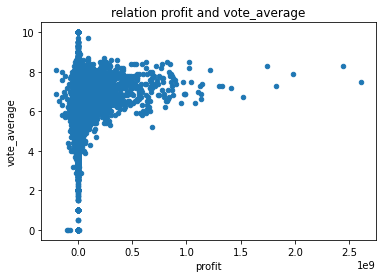

In [76]:
# Q3. profit이 높은 영화가 vote_average점수가 높을까?
movies3_df.plot(x='profit', y='vote_average', kind='scatter')
plt.title('relation profit and vote_average')

In [142]:
#### genre ###

# Q4. 각 영화에 포함된 영화장르 수는?  --> 한 영화에 포함된 장르수는 최소1개, 최대 4202개???????????

for i, e in enumerate(movies3_df['genres'][:5]):
    print(i, e)

genre_numbers=movies3_df['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()
pd.DataFrame(genre_numbers)
print(genre_numbers.describe())

0 [{'id': 18, 'name': '드라마'}, {'id': 80, 'name': '범죄'}, {'id': 35, 'name': '코미디'}]
1 [{'id': 18, 'name': '드라마'}, {'id': 35, 'name': '코미디'}]
2 [{'id': 80, 'name': '범죄'}, {'id': 35, 'name': '코미디'}]
3 [{'id': 28, 'name': '액션'}, {'id': 53, 'name': '스릴러'}, {'id': 80, 'name': '범죄'}]
4 [{'id': 12, 'name': '모험'}, {'id': 28, 'name': '액션'}, {'id': 878, 'name': 'SF'}]
count      80.000000
mean      285.525000
std       635.217096
min         1.000000
25%         5.000000
50%        30.000000
75%       219.250000
max      4202.000000
Name: genres, dtype: float64


In [129]:
# Q5. 가장 많은 영화장르 수는?

def genres_str_to_list(genres_str):
    import json
    genres_list = json.loads(genres_str.replace("\'", "\""))
    genre_id_list = []
    for genre in genres_list:
        genre_id_list.append(genre['name'])

    return genre_id_list

movies3_df['genre_name'] = movies3_df["genres"].map(genres_str_to_list)

list_of_genres=movies3_df['genre_name'].values
print(list_of_genres)

[list(['드라마', '범죄', '코미디']) list(['드라마', '코미디']) list(['범죄', '코미디']) ...
 list(['다큐멘터리']) list([]) list([])]


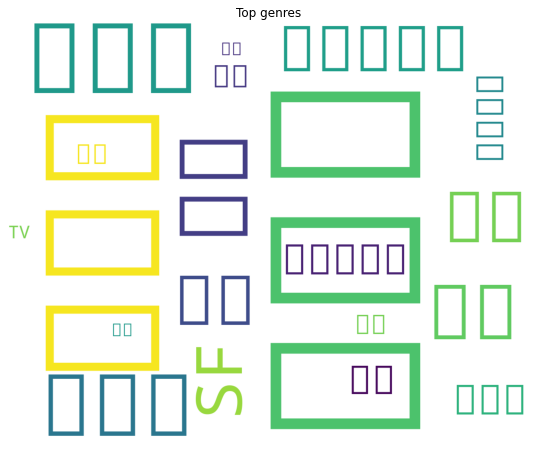

In [139]:
#!pip install wordcloud
from wordcloud import WordCloud

plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False, 
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

In [ ]:
# Q5. runtime이 가장 긴 영화는?


In [ ]:
#Q7. 인기도를 기준으로 평가한 관객이 가장 선호하는 runtime은?


In [105]:
movies3_df['release_year']=movies3_df['release_date'].dt.year
movies3_df['release_month']=movies3_df['release_date'].dt.month
movies3_df[movies3['original_language']=='ko'].sort_values(by='release_date', ascending=False).head(10)
#movies3_df[['id','title','release_date']].sort_values(by='release_date', ascending=False).tail()



C:\Users\bonomania\.conda\envs\ykseo\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,adult,budget,genres,id,original_language,original_title,overview,popularity,poster_path,production_companies,...,spoken_languages,status,title,video,vote_average,vote_count,profit,genre_names,release_year,release_month
515282,False,0.0,"[{'id': 53, 'name': '스릴러'}, {'id': 35, 'name':...",746349.0,ko,킬링 로맨스,섬나라 재벌과 결혼 후 은퇴한 전직 여배우가 옆집 삼수생을 만나며 벌어지는 이야기를...,1.802,/hpJMWeyZnNe9P6MPxPBRpVdwszy.jpg,"[{'id': 122308, 'logo_path': None, 'name': 'Re...",...,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Post Production,킬링 로맨스,False,0.0,0.0,0.0,"[스릴러, 코미디]",2021,12
548225,False,0.0,"[{'id': 18, 'name': '드라마'}]",785194.0,ko,소설가 구보의 하루,두 달 전 보냈던 자신의 작품의 출간 여부를 결정짓기 위해 출판사 편집장인 선배 기...,2.215,/jgdvConj2AzPqJ0nCkC48hf8DXl.jpg,"[{'id': 147251, 'logo_path': None, 'name': 'Da...",...,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Post Production,소설가 구보의 하루,False,0.0,0.0,0.0,[드라마],2021,12
511018,False,0.0,"[{'id': 99, 'name': '다큐멘터리'}]",741310.0,ko,나는 조선사람입니다,금강산에서 처음 만난 재일조선인들과 2002년부터 15년간 만남을 이어오면서 지금껏...,3.59,/lwPUwiom5bA51h9kahnVILLvwon.jpg,[],...,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Released,나는 조선사람입니다,False,0.0,0.0,0.0,[다큐멘터리],2021,12
440717,False,0.0,"[{'id': 16, 'name': '애니메이션'}, {'id': 18, 'name...",658210.0,ko,태일이,노동자의 권리를 위해 스스로 희망의 불꽃이 된 대한민국 노동운동 史의 상징적인 인물...,5.46,/jgfNqGZ4afLiZVHkVxnIRefOVBk.jpg,"[{'id': 21415, 'logo_path': '/rvsPyLlq4tK4FGiz...",...,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Released,태일이,False,0.0,0.0,0.0,"[애니메이션, 드라마]",2021,12
563401,False,0.0,"[{'id': 28, 'name': '액션'}]",801604.0,ko,샤크: 더 비기닝,뜻밖의 사고로 모든 것을 잃은 학교폭력 피해자 차우솔. 소년교도소에 수감된 뒤 우연...,20.181,/r3zWv3Ly1Y2NZrGHFaQntCS4MT7.jpg,"[{'id': 86981, 'logo_path': '/bS5ofUgzygOa5BE8...",...,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Released,샤크: 더 비기닝,False,0.0,0.0,0.0,[액션],2021,11
514043,False,0.0,"[{'id': 878, 'name': 'SF'}]",744866.0,ko,간호중,요양병원에서 10년째 식물인간으로 누워있는 어머니와 그 시간 동안 지칠 대로 지친 ...,23.022,/1jMgBs6vkgfaGAL7jYjnhaOjwUS.jpg,"[{'id': 96988, 'logo_path': '/akinMWSzcOArgVt7...",...,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Released,간호중,False,0.0,0.0,0.0,[SF],2021,11
507031,False,0.0,"[{'id': 10749, 'name': '로맨스'}, {'id': 35, 'nam...",736545.0,ko,연애 빠진 로맨스,"일도 연애도 마음대로 되지 않는 스물아홉 자영, 전 남친과의 격한 이별 후 호기롭게...",29.491,/hYbAzG9EZoKWjFa64XvISlQzeJ5.jpg,"[{'id': 7036, 'logo_path': '/javbyY0ZCvlFJtly3...",...,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Released,연애 빠진 로맨스,False,0.0,0.0,156413.0,"[로맨스, 코미디]",2021,11
514376,False,0.0,"[{'id': 18, 'name': '드라마'}, {'id': 53, 'name':...",745268.0,ko,주부,제이 박 감독의 작품,5.571,/3oap0Hay8jcpIa0is9N1jfdqOaU.jpg,[],...,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Released,주부,False,0.0,0.0,0.0,"[드라마, 스릴러]",2021,11
514051,False,0.0,"[{'id': 99, 'name': '다큐멘터리'}]",744879.0,ko,행복의 속도,가슴 저릴 만치 아름다운 풍광을 품고 있는 습원 지대 오제에는 많은 트레킹 족들이 ...,3.815,/150sWzPokkLRHf2MEiAERFB8qKG.jpg,"[{'id': 141002, 'logo_path': None, 'name': 'Hi...",...,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,행복의 속도,False,0.0,0.0,0.0,[다큐멘터리],2021,11
513513,False,0.0,"[{'id': 99, 'name': '다큐멘터리'}]",744263.0,ko,송해 1927,"제목 그대로, 대한민국이 모두 알고 있는 그 인물에 관한 다큐멘터리다. 그에 대한 ...",5.42,/kTJy7kWoOTlLVYpLhmOQGGz4P8W.jpg,"[{'id': 140999, 'logo_path': None, 'name': 'YR...",...,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Released,송해 1927,False,0.0,0.0,0.0,[다큐멘터리],2021,11
